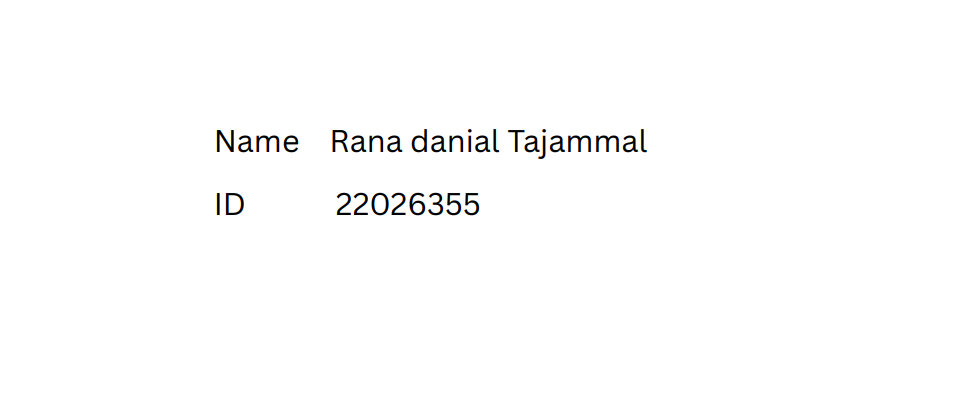

# Dataset Description

The data used for the coursework is **marketing campaign dataset** based on a case of a **retailer company**. The data set contains **1500 customer records**. Each record consists of **19 variables**, which includes socio-demographic and product ownership information.

# Import Libraries

In [1]:
# Data Analysis Libraries
import numpy as np
import pandas as pd
# Visulization Libraries 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
# Machine Learning Models
from sklearn import tree 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc

All datasets are in CSV format with following attributes:
1. CUST_ID
2. CUST_GENDER
3. AGE
4. CUST_MARITAL_STATUS
5. COUNTRY_NAME
6. CUST_INCOME_LEVEL
7. EDUCATION
8. OCCUPATION
9. HOUSEHOLD_SIZE
10. YRS_RESIDENCE,
11. AFFINITY_CARD (1 = High-value, 0 = Low-value)
12. BULK_PACK_DISKETTES
13. FLAT_PANEL_MONITOR
14. HOME_THEATER_PACKAGE
15. BOOKKEEPING_APPLICATION
16. PRINTER_SUPPLIES
17. Y_BOX_GAMES
18. OS_DOC_SET_KANJI
19. COMMENTS
<br> 

Marketing Campaign Dataset has 19 Features and 1500 records Attributes,which includes socio-demographic and product ownership information

# Load Dataset

In [2]:
# load the dataset
market_campaign_dataset=pd.read_csv('/content/Marketing Campaign data.csv')

In [3]:
# Display the dataset
market_campaign_dataset

,CUST_ID,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI,COMMENTS
0,101501,F,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0,Shopping at your store is a hassle. I rarely s...
1,101502,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0,Affinity card is great. I think it is a hassle...
2,101503,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0,"I purchased a new computer recently, but the m..."
3,101504,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0,Affinity card is great. I think it is a hassle...
4,101505,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0,Why didn't you start a program like this befor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,102996,M,17,NeverM,United States of America,"C: 50,000 - 69,999",10th,Other,1,1,0,0,0,0,0,1,1,0,I purchased a new computer from your store rec...
1496,102997,M,41,Married,Spain,"L: 300,000 and above",Bach.,Exec.,3,4,0,1,1,1,1,1,0,0,The new affinity card is great. Thank you. I d...
1497,102998,M,53,Married,United States of America,"J: 190,000 - 249,999",HS-grad,Exec.,3,8,1,1,1,1,1,1,0,0,I wanted to write you to let you know that I'v...
1498,102999,M,55,Married,United States of America,"C: 50,000 - 69,999",HS-grad,Cleric.,3,7,1,0,0,1,1,1,0,0,My sister told me about your store and I was i...


In [4]:
# Shape
market_campaign_dataset.shape

(1500, 19)

### Note : <br>
  Market Campaign Dataset contains 1500 records and 19 Attributes

# 1. Data Understanding

•	Produce a meta data table to show characteristics of each attribute.

In [5]:
# information of each feature in dataset
market_campaign_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_ID                  1500 non-null   int64 
 1   CUST_GENDER              1500 non-null   object
 2   AGE                      1500 non-null   int64 
 3   CUST_MARITAL_STATUS      1500 non-null   object
 4   COUNTRY_NAME             1500 non-null   object
 5   CUST_INCOME_LEVEL        1500 non-null   object
 6   EDUCATION                1500 non-null   object
 7   OCCUPATION               1500 non-null   object
 8   HOUSEHOLD_SIZE           1500 non-null   object
 9   YRS_RESIDENCE            1500 non-null   int64 
 10  AFFINITY_CARD            1500 non-null   int64 
 11  BULK_PACK_DISKETTES      1500 non-null   int64 
 12  FLAT_PANEL_MONITOR       1500 non-null   int64 
 13  HOME_THEATER_PACKAGE     1500 non-null   int64 
 14  BOOKKEEPING_APPLICATION  1500 non-null  

### Note : <br>
It can be seen that there are 1500 rows, which includes a header row, therefore 1499 cases. There are 19 features.

##  Missing and Erroneous Data

•	Describe missing or error data of each attribute

In [6]:
# Identify the Null or Missing Values
market_campaign_dataset.isna()

,CUST_ID,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI,COMMENTS
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


•	Identify the Null or Missing Value Columns




In [7]:
# Identify the Null or Missing Value Columns
market_campaign_dataset.isnull().sum()

CUST_ID                     0
CUST_GENDER                 0
AGE                         0
CUST_MARITAL_STATUS         0
COUNTRY_NAME                0
CUST_INCOME_LEVEL           0
EDUCATION                   0
OCCUPATION                  0
HOUSEHOLD_SIZE              0
YRS_RESIDENCE               0
AFFINITY_CARD               0
BULK_PACK_DISKETTES         0
FLAT_PANEL_MONITOR          0
HOME_THEATER_PACKAGE        0
BOOKKEEPING_APPLICATION     0
PRINTER_SUPPLIES            0
Y_BOX_GAMES                 0
OS_DOC_SET_KANJI            0
COMMENTS                   73
dtype: int64

### Note : <br>
COMMENTS Feature has Null or Missing or Blank Values



• Identify the Percentage of Null or Missing Values in Dataframe



In [8]:
# sum the missing or null values of each feature * 100
percentage_market_campaign_dataset=((market_campaign_dataset.isna() | market_campaign_dataset.isnull()).sum() * 100)
# sum divided by total record of dataset and value has 2 decimal
percentage_market_campaign_dataset=(percentage_market_campaign_dataset/len(market_campaign_dataset)).round(2)
# Calculate the Percentage of Each feature
print(percentage_market_campaign_dataset)

CUST_ID                    0.00
CUST_GENDER                0.00
AGE                        0.00
CUST_MARITAL_STATUS        0.00
COUNTRY_NAME               0.00
CUST_INCOME_LEVEL          0.00
EDUCATION                  0.00
OCCUPATION                 0.00
HOUSEHOLD_SIZE             0.00
YRS_RESIDENCE              0.00
AFFINITY_CARD              0.00
BULK_PACK_DISKETTES        0.00
FLAT_PANEL_MONITOR         0.00
HOME_THEATER_PACKAGE       0.00
BOOKKEEPING_APPLICATION    0.00
PRINTER_SUPPLIES           0.00
Y_BOX_GAMES                0.00
OS_DOC_SET_KANJI           0.00
COMMENTS                   4.87
dtype: float64




•  Null or Missing or Blank Values are replaced with **'?'** in COMMENTS Features of Market Campaign Dataset


In [9]:
# null or missing values are replace with '?'
market_campaign_dataset['COMMENTS']=market_campaign_dataset['COMMENTS'].replace(np.nan , '?')
#  Blanks are replace with '?'
market_campaign_dataset['COMMENTS']=market_campaign_dataset['COMMENTS'].replace('Blanks' , '?')
# Display the 30 Records of COMMENTS Feature in Dataset
print(market_campaign_dataset['COMMENTS'].head(30))

0     Shopping at your store is a hassle. I rarely s...
1     Affinity card is great. I think it is a hassle...
2     I purchased a new computer recently, but the m...
3     Affinity card is great. I think it is a hassle...
4     Why didn't you start a program like this befor...
5     Forget it. I 'm not giving you all my personal...
6     It is a good way to attract new shoppers. Afte...
7     I shop your store a lot.  I love your weekly s...
8     Affinity card makese sense only for bulk purch...
9     Could you send an Affinity Card to my mother i...
10    Shopping at your store is a hassle. I rarely s...
11    The new affinity card is great. Thank you. I d...
12    Thanks but even with your discounts, your prod...
13    Affinity card is great. I think it is a hassle...
14    I purchased the new mouse pads and love them. ...
15    Don't send me any more promotions.  I get too ...
16    Shopping at your store is a hassle. I rarely s...
17    Don't send me any more promotions.  I get 

**Note**  <br> COMMENTS Feature  has approx  **4.87%** missing or null values  in Marketing Campaign Dataset



•  Recheck Null or missing or Blanks values of Features in Market Campaign Dataset



In [10]:
# Recheck the Missing or null Values
market_campaign_dataset.isnull().sum()

CUST_ID                    0
CUST_GENDER                0
AGE                        0
CUST_MARITAL_STATUS        0
COUNTRY_NAME               0
CUST_INCOME_LEVEL          0
EDUCATION                  0
OCCUPATION                 0
HOUSEHOLD_SIZE             0
YRS_RESIDENCE              0
AFFINITY_CARD              0
BULK_PACK_DISKETTES        0
FLAT_PANEL_MONITOR         0
HOME_THEATER_PACKAGE       0
BOOKKEEPING_APPLICATION    0
PRINTER_SUPPLIES           0
Y_BOX_GAMES                0
OS_DOC_SET_KANJI           0
COMMENTS                   0
dtype: int64

**Note** <br>
Null or missing value replace with '?'. So, Comments Have not Missing or Null or Blank Values

# 2. Data Preprocessing



•  Remove  the '?' values rows from Market Campaign Dataset



In [11]:
# replace the '?' value is null values
market_campaign_dataset=market_campaign_dataset.replace('?' , np.nan)
# remove the null values rows from dataset
market_campaign_dataset=market_campaign_dataset.dropna()

**Note** <br>
Market Campaign Dataset contains null or missing or blanks records, these records are replace with '?' ,Because model does not train on null or missing or blanks records.After Remove the missing or null records from dataset, Dataset Contains **19** features and **1351** records

#  Data Transforming

### •	Write Python programs to transform variable into the following:
a)	CUST_GENDER into binary F - 0, M -1

In [12]:
# Tranform the CUST_GENDER variable  into binary F - 0, M -1
market_campaign_dataset['CUST_GENDER']=market_campaign_dataset['CUST_GENDER'].apply(lambda cust_gender : 0 if cust_gender== 'F' else 1)
print(market_campaign_dataset['CUST_GENDER'])

0       0
1       1
2       0
3       1
4       1
       ..
1495    1
1496    1
1497    1
1498    1
1499    0
Name: CUST_GENDER, Length: 1351, dtype: int64


**Note** <br>
After Applying the Tranforming on **CUST_GENDER** Varibale, **Female** is converted into **0** and **Male** is converted into **1**



 b)	COUNTRY_NAME into ordinal number based on their occurrence in the data set in descending order.

In [13]:
# COUNTRY_NAME into ordinal number based on their occurrence in the data set in descending order.
market_campaign_dataset['COUNTRY_NAME']=sorted(pd.factorize(market_campaign_dataset['COUNTRY_NAME'].sort_values(ascending=False))[0], reverse=True)
print(market_campaign_dataset['COUNTRY_NAME'])

0       17
1       17
2       17
3       17
4       17
        ..
1495     0
1496     0
1497     0
1498     0
1499     0
Name: COUNTRY_NAME, Length: 1351, dtype: int64


**Note** <br>
After Transforming the COUNTRY_NAME Varibale of Market Campaign Dataset, COUNTRY_NAME convert into numeric dataset(0-17) and show into Descending Order.

c)	CUST_INCOME_LEVEL into ordinal numbers 1 - 12 accordingly.

In [14]:
market_campaign_dataset['CUST_INCOME_LEVEL']

0       J: 190,000 - 249,999
1       I: 170,000 - 189,999
2       H: 150,000 - 169,999
3         B: 30,000 - 49,999
4       K: 250,000 - 299,999
                ...         
1495      C: 50,000 - 69,999
1496    L: 300,000 and above
1497    J: 190,000 - 249,999
1498      C: 50,000 - 69,999
1499     E: 90,000 - 109,999
Name: CUST_INCOME_LEVEL, Length: 1351, dtype: object

In [15]:
# split the CUST_INCOME_LEVE into further three columns
market_campaign_dataset[['CUST_INCOME_LEVEL_0' , 'CUST_INCOME_LEVEL_1' , 'CUST_INCOME_LEVEL_2']]=market_campaign_dataset['CUST_INCOME_LEVEL'].str.split(': | - | and' , expand=True)
# Drop the Columns
market_campaign_dataset=market_campaign_dataset.drop(columns=['CUST_INCOME_LEVEL_0' , 'CUST_INCOME_LEVEL'] , axis=1)


In [16]:
# replace the above with digit in CUST_INCOME_LEVE_2 Feature of Dataset
market_campaign_dataset['CUST_INCOME_LEVEL_2']=market_campaign_dataset['CUST_INCOME_LEVEL_2'].replace(' above' , '9999999')
# replace the Below 30000 with digit in CUST_INCOME_LEVE_2 Feature of Dataset
market_campaign_dataset['CUST_INCOME_LEVEL_1']=market_campaign_dataset['CUST_INCOME_LEVEL_2'].replace(' Below 30000' , '30000')

In [17]:
# Drop rows with missing values
market_campaign_dataset = market_campaign_dataset.dropna(subset=['CUST_INCOME_LEVEL_1', 'CUST_INCOME_LEVEL_2'])

# Remove commas from CUST_INCOME_LEVEL_1 column and convert to integer
market_campaign_dataset['CUST_INCOME_LEVEL_1'] = market_campaign_dataset['CUST_INCOME_LEVEL_1'].str.replace(',', '').astype(int)

# Remove commas from CUST_INCOME_LEVEL_2 column and convert to integer
market_campaign_dataset['CUST_INCOME_LEVEL_2'] = market_campaign_dataset['CUST_INCOME_LEVEL_2'].str.replace(',', '').astype(int)

# Convert income level columns to ordinal numbers
for i, col in enumerate(['CUST_INCOME_LEVEL_1', 'CUST_INCOME_LEVEL_2']):
    market_campaign_dataset[col] = pd.qcut(market_campaign_dataset[col], q=12, labels=False, duplicates='drop') + 1

# Add a new column for the combined income level
market_campaign_dataset['CUST_INCOME_LEVEL'] = (market_campaign_dataset['CUST_INCOME_LEVEL_1'] + market_campaign_dataset['CUST_INCOME_LEVEL_2']) / 2
market_campaign_dataset=market_campaign_dataset.drop(columns=['CUST_INCOME_LEVEL_1', 'CUST_INCOME_LEVEL_2'] , axis=1)
# Print the updated dataset
print(market_campaign_dataset.head())


   CUST_ID  CUST_GENDER  AGE CUST_MARITAL_STATUS  COUNTRY_NAME EDUCATION  \
0   101501            0   41              NeverM            17   Masters   
1   101502            1   27              NeverM            17     Bach.   
2   101503            0   20              NeverM            17   HS-grad   
3   101504            1   45             Married            17     Bach.   
4   101505            1   34              NeverM            17   Masters   

  OCCUPATION HOUSEHOLD_SIZE  YRS_RESIDENCE  AFFINITY_CARD  \
0      Prof.              2              4              0   
1      Sales              2              3              0   
2    Cleric.              2              2              0   
3      Exec.              3              5              1   
4      Sales             9+              5              1   

   BULK_PACK_DISKETTES  FLAT_PANEL_MONITOR  HOME_THEATER_PACKAGE  \
0                    1                   1                     1   
1                    1                  

In [18]:
market_campaign_dataset['CUST_INCOME_LEVEL']

0       7.0
1       6.0
2       5.0
3       1.0
4       8.0
       ... 
1495    1.0
1496    9.0
1497    7.0
1498    1.0
1499    2.0
Name: CUST_INCOME_LEVEL, Length: 1326, dtype: float64

**Note** <br>
**CUST_INCOME_LEVEL** feature of Market Campaign Datset  convert into ordinal numbers 1 - 12 



d)	EDUCATION into ordinal numbers based on USA education level (do your research if necessary) in descending order.

In [19]:

# Define a dictionary with ordinal values for each education level
ordinal_values = {'PhD':15, 'Masters':14, 'Profsc':13, 'Bach.':12, 'Assoc-V':11, 'Assoc-A':10,
                  'HS-grad':9, '< Bach.':8, '12th':7, '11th':6, '10th':5, '9th':4,
                  '7th-8th':3, '5th-6th':2, '1st-4th':1, 'Presch.':0}


# Map the integer values to ordinal values based on the USA education level in descending order
market_campaign_dataset['EDUCATION'] = sorted(market_campaign_dataset['EDUCATION'].apply(lambda x: ordinal_values.get(x)) , reverse=True)


In [20]:
market_campaign_dataset['EDUCATION']

0       15
1       15
2       15
3       15
4       15
        ..
1495     1
1496     1
1497     0
1498     0
1499     0
Name: EDUCATION, Length: 1326, dtype: int64

**Note** <br>
**EDUCATION** Feature in Market Campaign Dataset converted  into ordinal numbers based on USA education level ('PhD','Masters','Profsc', 'Bach.', 'Assoc-V', 'Assoc-A', 'HS-grad', '< Bach.', '12th', '11th', '10th', '9th','7th-8th', '5th-6th', '1st-4th', 'Presch.') in descending order.



e)	HOUSEHOLD_SIZE into ordinal numbers based on number of rooms.

In [21]:
market_campaign_dataset['HOUSEHOLD_SIZE'].unique()

array(['2', '3', '9+', '6-8', '1', '4-5'], dtype=object)

In [22]:

ordinal_values_household={ '1' : 0 , '2' : 1 , '3' : 2 , '4-5' : 3 , '6-8' : 4 , '9+' : 5 }



# Map the integer values to ordinal values based on the USA education level in descending order
market_campaign_dataset['HOUSEHOLD_SIZE'] = sorted(market_campaign_dataset['HOUSEHOLD_SIZE'].apply(lambda x: ordinal_values_household.get(x)) , reverse=True)

In [23]:
# Reindexs the index of Market Campaign Dataset
market_campaign_dataset=market_campaign_dataset.reset_index()

In [24]:
market_campaign_dataset.columns

Index(['index', 'CUST_ID', 'CUST_GENDER', 'AGE', 'CUST_MARITAL_STATUS',
       'COUNTRY_NAME', 'EDUCATION', 'OCCUPATION', 'HOUSEHOLD_SIZE',
       'YRS_RESIDENCE', 'AFFINITY_CARD', 'BULK_PACK_DISKETTES',
       'FLAT_PANEL_MONITOR', 'HOME_THEATER_PACKAGE', 'BOOKKEEPING_APPLICATION',
       'PRINTER_SUPPLIES', 'Y_BOX_GAMES', 'OS_DOC_SET_KANJI', 'COMMENTS',
       'CUST_INCOME_LEVEL'],
      dtype='object')

•	Write Python programs to reduce variables with justifications and comments (e.g remove variables with no influences on the target variable and COMMENTS which requires dedicated text mining tools) 


Correlation With Target Values



In [25]:
# Corelation with Target Variable AFFINITY CARD
market_campaign_dataset_corr=market_campaign_dataset.corr()['AFFINITY_CARD'].sort_values()
print(market_campaign_dataset_corr)

Y_BOX_GAMES               -0.281063
CUST_ID                   -0.034864
index                     -0.034864
FLAT_PANEL_MONITOR        -0.027153
CUST_INCOME_LEVEL         -0.027040
BULK_PACK_DISKETTES       -0.015547
COUNTRY_NAME               0.029240
HOUSEHOLD_SIZE             0.042548
EDUCATION                  0.048460
BOOKKEEPING_APPLICATION    0.173639
CUST_GENDER                0.231582
AGE                        0.249937
HOME_THEATER_PACKAGE       0.282478
YRS_RESIDENCE              0.360886
AFFINITY_CARD              1.000000
PRINTER_SUPPLIES                NaN
OS_DOC_SET_KANJI                NaN
Name: AFFINITY_CARD, dtype: float64


<ipython-input-25-88b202eb80e5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  market_campaign_dataset_corr=market_campaign_dataset.corr()['AFFINITY_CARD'].sort_values()


### HeatMap

<ipython-input-26-64d11b3c85de>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(market_campaign_dataset.corr(), dtype=bool))
<ipython-input-26-64d11b3c85de>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(market_campaign_dataset.corr(), annot=True, mask = mask, cmap=cmap)


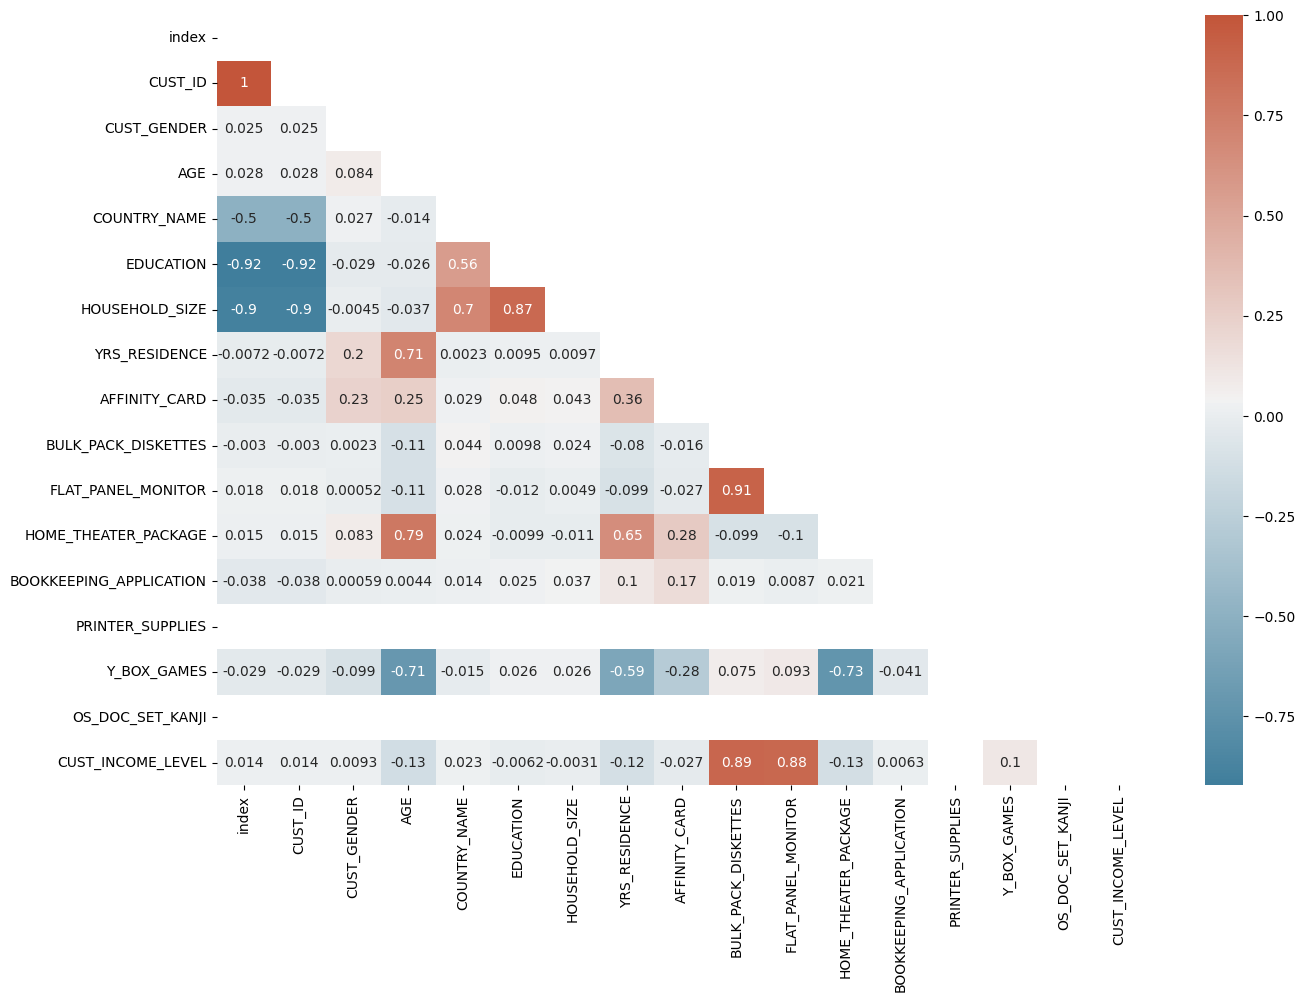

In [26]:
# figure size
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(market_campaign_dataset.corr(), dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(market_campaign_dataset.corr(), annot=True, mask = mask, cmap=cmap)
plt.show()

In [27]:
# Drop the Unnecessary features
market_campaign_dataset=market_campaign_dataset.drop(columns=['PRINTER_SUPPLIES' , 'OS_DOC_SET_KANJI'])

In [28]:
market_campaign_dataset.head()

,index,CUST_ID,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,Y_BOX_GAMES,COMMENTS,CUST_INCOME_LEVEL
0,0,101501,0,41,NeverM,17,15,Prof.,5,4,0,1,1,1,1,0,Shopping at your store is a hassle. I rarely s...,7.0
1,1,101502,1,27,NeverM,17,15,Sales,5,3,0,1,1,0,1,1,Affinity card is great. I think it is a hassle...,6.0
2,2,101503,0,20,NeverM,17,15,Cleric.,5,2,0,1,0,0,1,1,"I purchased a new computer recently, but the m...",5.0
3,3,101504,1,45,Married,17,15,Exec.,5,5,1,0,0,1,1,0,Affinity card is great. I think it is a hassle...,1.0
4,4,101505,1,34,NeverM,17,15,Sales,5,5,1,1,1,0,1,0,Why didn't you start a program like this befor...,8.0


**Note** <br>
Drop the **PRINTER_SUPPLIES** and **OS_DOC_SET_KANJI** Columns from Market Campaign Dataset,According Above heatmap representation , correlation values of these columns are NA, MEANS these Columns do not effect on the Performance of  Target Variables **AFFINITY CARD**.

# Data analysis



•	Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of all variables. 


In [29]:
# summary statistics of sum, mean, standard deviation
Statistics_Summary=market_campaign_dataset.describe()

In [30]:
# skewness and kurtosis
skewness=market_campaign_dataset.skew()
kurtosis=market_campaign_dataset.kurt()
Statistics_Summary.loc['skewness']=skewness
Statistics_Summary.loc['kurtosis']=kurtosis

<ipython-input-30-a3cb4173427e>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness=market_campaign_dataset.skew()
<ipython-input-30-a3cb4173427e>:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis=market_campaign_dataset.kurt()


In [31]:
# Display the summary statistics of sum, mean, standard deviation, skewness, and kurtosis of all variables.
Statistics_Summary

,index,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,EDUCATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,Y_BOX_GAMES,CUST_INCOME_LEVEL
count,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000
mean,755.255656,102256.255656,0.686275,38.679487,1.245852,9.298643,1.918552,4.125943,0.263952,0.641026,0.596531,0.575415,0.880090,0.282805,5.466063
std,436.081457,436.081457,0.464181,13.142837,3.977660,2.595168,1.388145,1.877768,0.440940,0.479881,0.490778,0.494466,0.324978,0.450533,2.603042
min,0.000000,101501.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,377.250000,101878.250000,0.000000,28.000000,0.000000,8.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,758.500000,102259.500000,1.000000,37.000000,0.000000,9.000000,2.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000
75%,1131.750000,102632.750000,1.000000,47.000000,0.000000,12.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1499.000000,103000.000000,1.000000,90.000000,17.000000,15.000000,5.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000
skewness,-0.023569,-0.023569,-0.803806,0.576199,3.146027,-0.296162,0.886886,0.790575,1.072277,-0.588641,-0.393973,-0.305496,-2.342709,0.965625,-0.351884
kurtosis,-1.212856,-1.212856,-1.355943,0.085536,8.555609,0.703659,0.352932,1.764425,-0.851508,-1.656002,-1.847574,-1.909555,3.493550,-1.069184,-1.157511



Label Enconding



In [32]:
# Define the labelEncoder
le=preprocessing.LabelEncoder()
# categorical variable convert into numeric e-g COMMENTS , OCCUPATION AND CUST MARTIAL STATUS
market_campaign_dataset['COMMENTS']=le.fit_transform(market_campaign_dataset['COMMENTS'])
market_campaign_dataset['OCCUPATION']=le.fit_transform(market_campaign_dataset['OCCUPATION'])
market_campaign_dataset['CUST_MARITAL_STATUS']=le.fit_transform(market_campaign_dataset['CUST_MARITAL_STATUS'])




•	Write a Python program to calculate and show correlation of each variable with the target variable 
he target variable 



In [33]:
market_campaign_dataset_corr=market_campaign_dataset.corr()['AFFINITY_CARD'].sort_values()
print(market_campaign_dataset_corr)

Y_BOX_GAMES               -0.281063
CUST_MARITAL_STATUS       -0.101260
CUST_ID                   -0.034864
index                     -0.034864
FLAT_PANEL_MONITOR        -0.027153
CUST_INCOME_LEVEL         -0.027040
BULK_PACK_DISKETTES       -0.015547
COMMENTS                  -0.000172
OCCUPATION                 0.010677
COUNTRY_NAME               0.029240
HOUSEHOLD_SIZE             0.042548
EDUCATION                  0.048460
BOOKKEEPING_APPLICATION    0.173639
CUST_GENDER                0.231582
AGE                        0.249937
HOME_THEATER_PACKAGE       0.282478
YRS_RESIDENCE              0.360886
AFFINITY_CARD              1.000000
Name: AFFINITY_CARD, dtype: float64


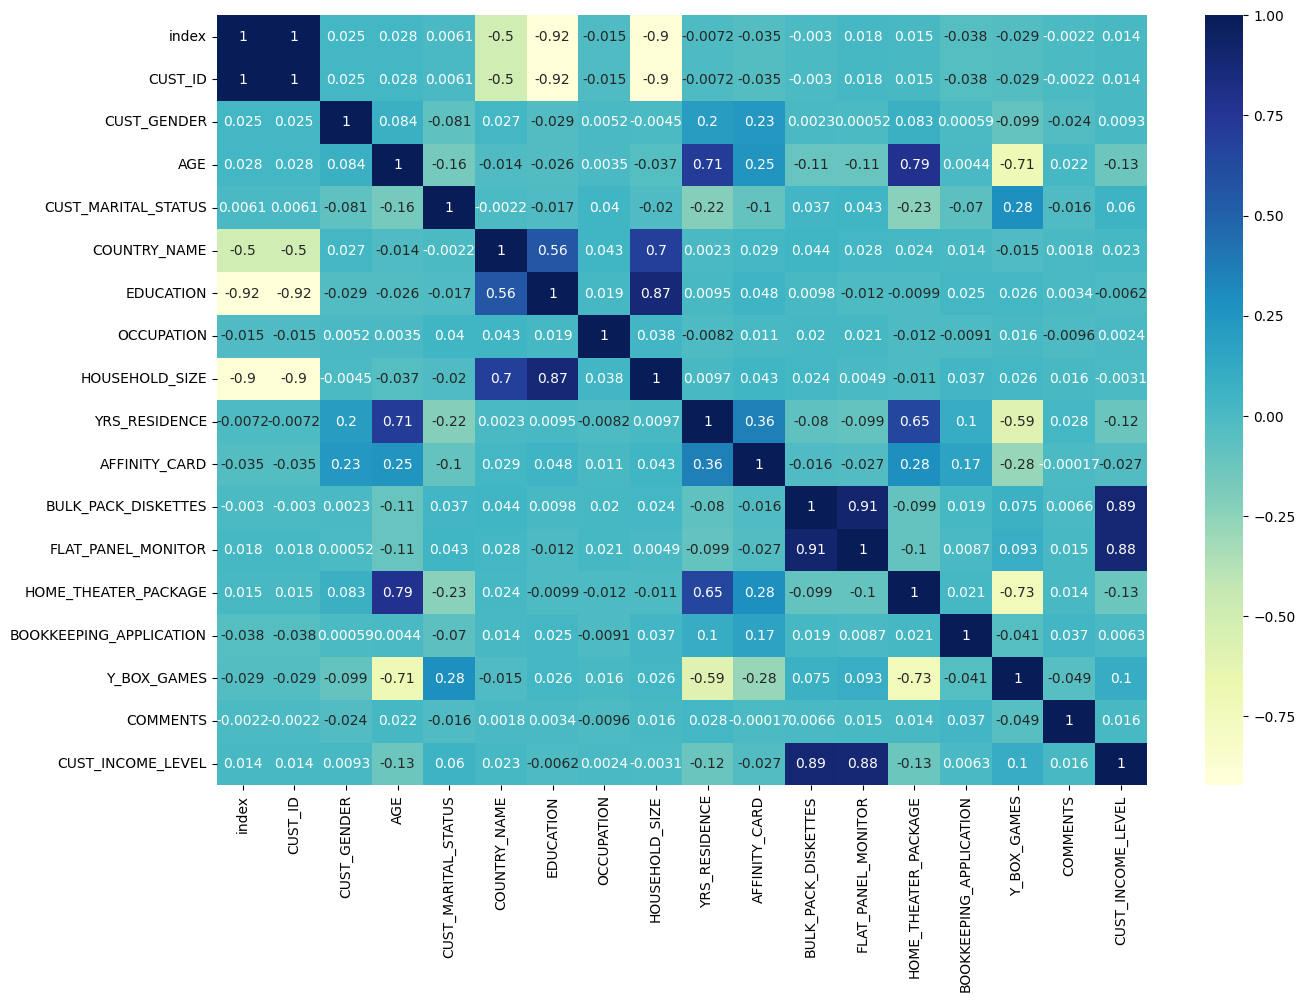

In [34]:
plt.figure(figsize=(15,10))
# PLOT THE HEATMAP
sns.heatmap(market_campaign_dataset.corr() , annot=True , cmap="YlGnBu")
plt.show()



> Remove the Unnecessary Variables 



In [35]:
# Drop the columns e-g CUST_ID, COMMENTS , index, HOUSEHOLD_SIZE and EDUCATION
market_campaign_dataset=market_campaign_dataset.drop(columns=['CUST_ID' , 'COMMENTS' , 'index' , 'HOUSEHOLD_SIZE' , 'EDUCATION'])
print(market_campaign_dataset.head())

   CUST_GENDER  AGE  CUST_MARITAL_STATUS  COUNTRY_NAME  OCCUPATION  \
0            0   41                    3            17           9   
1            1   27                    3            17          11   
2            0   20                    3            17           1   
3            1   45                    2            17           3   
4            1   34                    3            17          11   

   YRS_RESIDENCE  AFFINITY_CARD  BULK_PACK_DISKETTES  FLAT_PANEL_MONITOR  \
0              4              0                    1                   1   
1              3              0                    1                   1   
2              2              0                    1                   0   
3              5              1                    0                   0   
4              5              1                    1                   1   

   HOME_THEATER_PACKAGE  BOOKKEEPING_APPLICATION  Y_BOX_GAMES  \
0                     1                        1         

**Note** <br>
**CUST_ID**  and **index**  are a Strong Postive Correlation, it means its values are not effect on the performance of Target Varibale **Afinity Card**. **HOUSEHOLD_SIZE ,  EDUCATION **and** COMMENTS** are Strong Negative Correlation. It Means,  its values are not effect on the performance of Target Varibale **Afinity Card**.

# Data exploration



•	Write a Python program to show histogram plot of any user chosen variables. Program should be continuing running until user chose exit.


In [40]:
# User enter the variable name
variable_name = input("Enter the name of the variable to create a histogram of: ")

Enter the name of the variable to create a histogram of: AGE


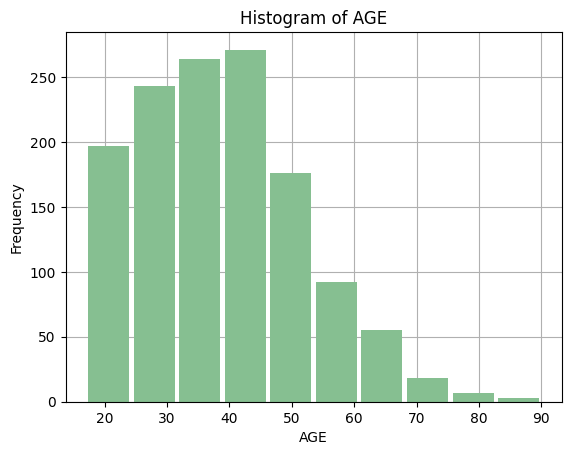

In [43]:
# Create the histogram
market_campaign_dataset[variable_name].hist(color='#86bf91', zorder=2, rwidth=0.9)

# Set the title and axis labels
plt.title("Histogram of " + variable_name)
plt.xlabel(variable_name)
plt.ylabel("Frequency")

# Show the histogram
plt.show()

•	Write a Python program to show scatter plot for any two user chosen variables. Program should be continuing running until user chose exit.

In [54]:
# User enter the variable name
Input_variable_name = input("Enter the name of the variable to create a Scatter Plot of: ")
# User enter the Target Variable name
Target_variable_name = input("Enter the name of the variable to create a Scatter Plot of: ")

Enter the name of the variable to create a Scatter Plot of: AGE
Enter the name of the variable to create a Scatter Plot of: AFFINITY_CARD


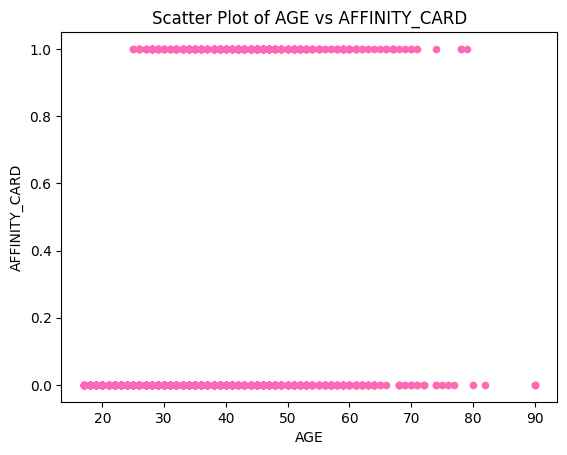

In [57]:
market_campaign_dataset.plot.scatter(x = Input_variable_name , y = Target_variable_name , color='#FF69B4')
# Set the title and axis labels
plt.title('Scatter Plot of ' + Input_variable_name + ' vs ' + Target_variable_name)
plt.xlabel(Input_variable_name)
plt.ylabel(Target_variable_name)

# Show the scatter plot
plt.show()

## 5.	Data Mining
Build two Predictive Models to predict AFFINITY_CARD taken in the marketing campaign with Python using the prepared data. 

In [ ]:
# Training and Target variable 
x=market_campaign_dataset.drop(columns=['AFFINITY_CARD'] , axis=1)
y=market_campaign_dataset['AFFINITY_CARD']

In [ ]:
# shape
print(x.shape)
print(y.shape)

(1326, 12)
(1326,)


# Feature Engineering

In [ ]:
# split the dataset into training and testing 
X_train , X_test, y_train , y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
# shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(994, 12)
(332, 12)
(994,)
(332,)


# Training Machine Learning Models

1. Predictive Model 

### Decesion Tree Classification

In [ ]:
# Define model
dt_model=tree.DecisionTreeClassifier()
# train model on training dataset
dt_model=dt_model.fit(X_train , y_train)

In [ ]:
# Evaluate the performance
y_pred=dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7409638554216867


In [ ]:
# Grid Search define
grid=GridSearchCV(dt_model , param_grid={ "criterion" : ['gini' , 'entropy'] , "max_depth" : range(1,10) , "min_samples_split" : range(1,10) ,  "min_samples_leaf" : range(1,5)} , cv=10 , verbose=1 , n_jobs=10)
grid_dt_model=grid.fit(X_train , y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

In [ ]:
# Evaluate 
y_pred = grid_dt_model.predict(X_test)
training_accuracy=grid_dt_model.best_score_
print('training_accurcay=' ,training_accuracy )
print(f' confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print(f' classification report:')
print(classification_report(y_test, y_pred))

training_accurcay= 0.8039191919191919
 confusion matrix:
[[217  29]
 [ 27  59]]
 classification report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       246
           1       0.67      0.69      0.68        86

    accuracy                           0.83       332
   macro avg       0.78      0.78      0.78       332
weighted avg       0.83      0.83      0.83       332



In [ ]:

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, y_pred)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.8313253012048193


**Note** <br>
The Training accurcay on Marketing Camapign  dataset is 73%. We apply Grid Search technique to improve the Training accurcay of Dataset.
<br>
Before_GridSearchApply_training_Accuracy=73% <br>
After_GridSearchApply_Training_Accuracy=78% <br>
Testing_Auuracy=78%

In [ ]:
# Prediction
y_score1 = grid_dt_model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [ ]:
# ROC_CURVE_ACCURACY
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.835791264889393


# ROC_CURVE OF Decision Tree Classification

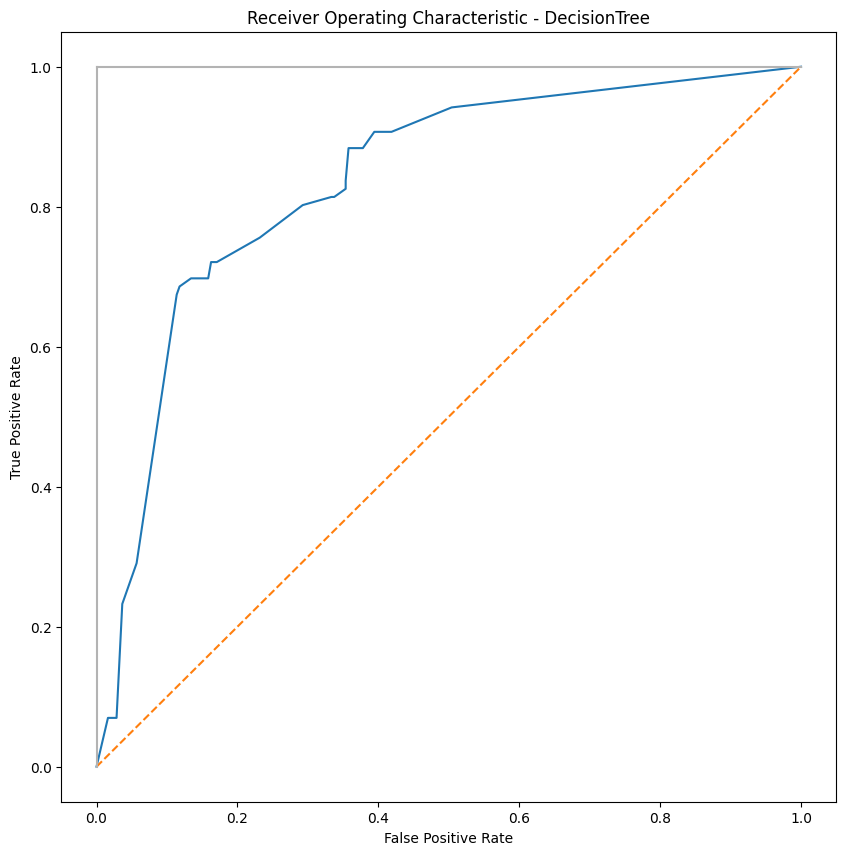

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

2. Predictive Model 

### Random Forest Model 

In [ ]:
# Define , Built and Train
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfc, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Training Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
print(f' confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print(f' classification report:')
print(classification_report(y_test, y_pred))

Training Accuracy: 0.791 (0.031)
 confusion matrix:
[[220  26]
 [ 41  45]]
 classification report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       246
           1       0.63      0.52      0.57        86

    accuracy                           0.80       332
   macro avg       0.74      0.71      0.72       332
weighted avg       0.79      0.80      0.79       332



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.7981927710843374


Note
Training accurcay = 79% <br>
Testing_Auuracy=80%

In [ ]:
y_score2 = rfc.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

In [ ]:
print('roc_auc_score for Random Forest : ', roc_auc_score(y_test, y_score2))

roc_auc_score for Random Forest :  0.8458356967290602


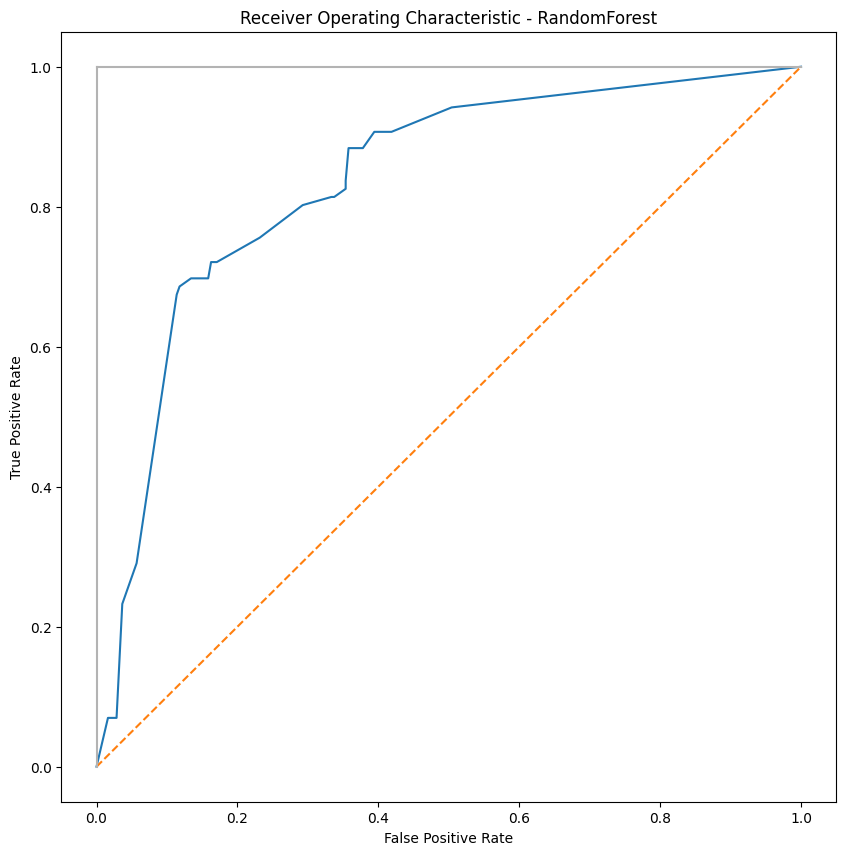

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Compare the Random Forest and Decision Tree Classification Model 

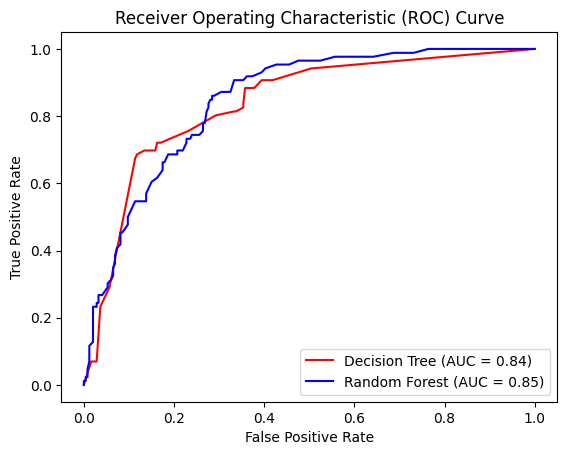

In [ ]:
# calculate the false positive rate, true positive rate, and threshold for the Decision Tree Classifier
roc_auc_dt = auc(false_positive_rate1, true_positive_rate1)


# calculate the false positive rate, true positive rate, and threshold for the Random Forest Classifier
roc_auc_rf = auc(false_positive_rate2, true_positive_rate2)

# plot the ROC curves for both classifiers
plt.plot(false_positive_rate1, true_positive_rate1, color='red', label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(false_positive_rate2, true_positive_rate2, color='blue', label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

# add labels and legend
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# show the plot
plt.show()


# Conclusion : <br>
Marketing Campaign Dataset contains **19** Attributes and **1500. CUST_ID ,COMMENTS, index , HOUSEHOLD_SIZE, EDUCATION , PRINTER_SUPPLIES and OS_DOC_SET_KANJI**, these features of Marketing Campaign Dataset do not effect the Target Feature of Affinity Card (0-1).That's Why , these features are dropped out from Marketing Campaign Dataset. This is a Binary Classification Problem. So, We trained the modeLs of Classification(Random Forest classification and Decision Tree Classification Models). Random Forest Classification model perform well as compare to Decision Tree Classification problem <BR>

**AUC Of Random Forest Model =83%**<br>
**AUC Of Decision Tree Model=78%**

## 6.	Discussion and reflection of the work

## 7.	Professional document organisation and presentation 